# Analysis

Import data:

1. Predicted class probabilities: df_pred_prob
2. Predicted class labels: df_pred_lbl
3. Ground truth labels: df_ground_truth

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
import opencv
import cv2

df_pred_prob = pd.read_csv('Simple_CNN_tiff_pred_prob.csv')
df_pred_lbl = pd.read_csv('Simple_CNN_tiff_pred_lbl.csv')
df_ground_truth = pd.read_csv('Simple_CNN_tiff_ground_truth.csv')

pred_lbl_list = pd.Series(df_pred_lbl)

Calculations:

1. Predicted labels match groundtruth, where groundtruth label=1: df_match
2. Fraction of matched labels, where groundtruth label=1: fraction_match

In [101]:
df_positive = df_ground_truth > 0
df_match = df_positive * (df_pred_lbl == df_ground_truth)
sum_match = df_match.sum(axis=0)
sum_positive = df_positive.sum(axis=0)
fraction_match = sum_match  / sum_positive
fraction_match = fraction_match[1:]

df_sum = pd.DataFrame([sum_positive,sum_match], index=['nr of positives', 'nr of matches'])
df_sum = df_sum.T[1:]
df_sum

,nr of positives,nr of matches
blow_down,28,0
bare_ground,279,0
conventional_mine,32,5
blooming,115,0
cultivation,1476,743
artisinal_mine,114,68
haze,916,688
primary,12513,12479
slash_burn,77,0
habitation,1179,770


Plot number of matched labels per class

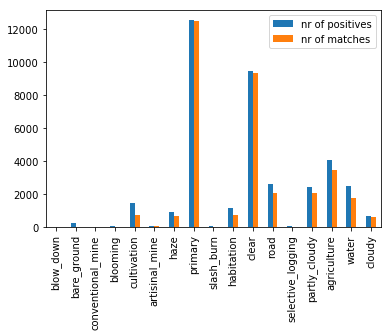

In [102]:
df_sum.plot(kind='bar')

Plot misclassified images to find clues why.

Cloudy should be easy, so checking those first.

In [108]:
df_ground_truth['cloudy'][0]

0

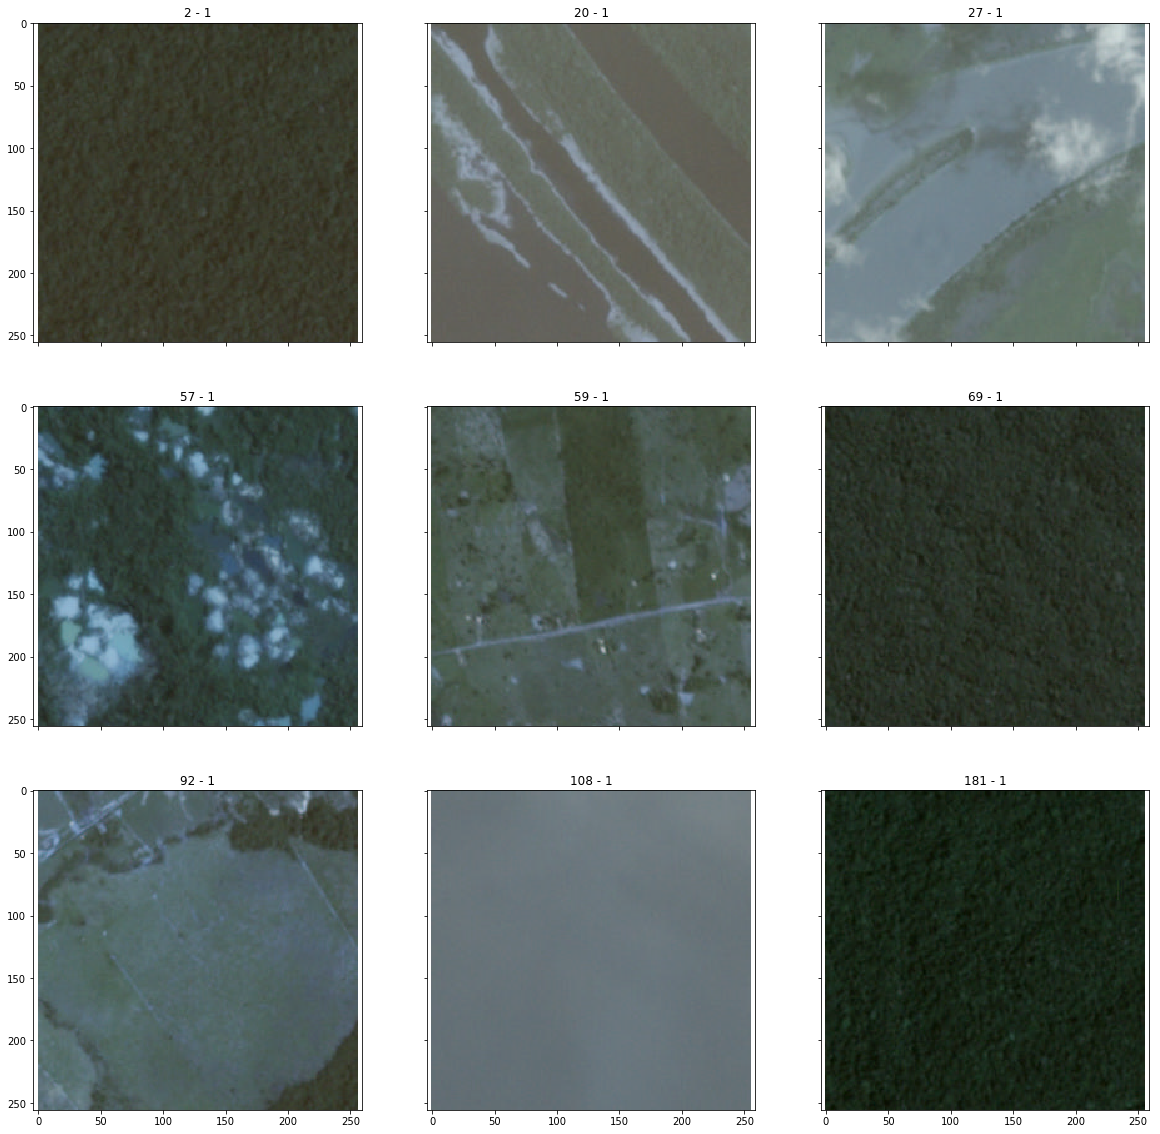

In [110]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))

i = 0
for f in df_match.index:
    if df_match_cloudy[f]==False:
        if i < 9:
            img = io.imread('../data/train-jpg/train_{}.jpg'.format(f))
            l = df_ground_truth['cloudy'][f]
            #img = io.imread('../data/train-tif-v2/train_{}.tif'.format(f))
            ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
            #ax[i // 4, i % 4].show()
        i += 1
    
plt.show()